### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

Uses of machine learning include to drawing casual insights (supervised), predicting future events(supervised) or understanding patterns in data(unsupervised). Machine learning certainly should not be used if there is not enough data and/or no proper preparation (cleaning, analysis) preceded machine learning. The target variable should also be defined prior to the use of machine learning. In order to use machine learning effectively, it is important to have robust systems. 
If the problem is such that it can be solved using a set of simple rules and there is no need of large data analysis, then machine learning is likely not necessary. On the contrary, machine learning is especially useful if the rules cannot be coded or the problem cannot be scalled effectively using simple rules.

### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

In [260]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder


In [261]:
loans = pd.read_csv('Loans_full_schema.csv')
loans.head(3)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0


#### First I explore features of the dataset:

In [262]:
print(loans.shape)
print(loans.dtypes)

(10000, 55)
emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amo

### Dissecting the dataset

#### There are at least two subsets of data here: loans taken alone and joint loans.  How we look at the dataset would depend on what we are interested in. If for example we are trying to figure out the probability of default, these two subsets are worth to discuss separately as the latter are backed by two incomes.

In [263]:
joint = loans[loans['annual_income_joint'].notna() | loans['verification_income_joint'].notna() | loans['debt_to_income_joint'].notna()]

joint.shape

(1495, 55)

In [264]:
nonjoint = loans[loans['annual_income_joint'].isna() & loans['verification_income_joint'].isna() & loans['debt_to_income_joint'].isna()]
#from this one we can drop columns related to joint ownership, as well as employment title, which is very arbitrary, will do this when dropping other unecessary columns

nonjoint.shape

(8505, 55)

### Cheking and handling NaNs

In [265]:
print('joint loans:')
print('............')
print(joint.isna().sum())
print('----------------------------------------')
print('nonjoint loans:')
print('...............')
print(nonjoint.isna().sum())

joint loans:
............
emp_title                            203
emp_length                           202
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                    0
verification_income_joint             40
debt_to_income_joint                   0
delinq_2y                              0
months_since_last_delinq             888
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               1223
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts   

Some of the NaN containing columns are irrevelant (emp_title, emp_length, debt_to_income in the joint debt dataset (same information present in debt_to_income_joint), verification_income_joint (redundant because of verified_income column)) for our purposes, so we will just drop them in the next step. The remaining columns are all containing time passed since late etc: NaN's mean that the corresponding person has never been late. We replace those NaN's with 0's, which means the same. So en gross now I replace all NaN's with 0's.

In [266]:
joint = joint.fillna(0)
nonjoint = nonjoint.fillna(0)

### Dropping unnecessary columns

There are a number of columns we would need to examine more closely in both frames, such as 'verified_income', 'homeownership', 'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method', to see if any can be dropped or if kept, how they could be encoded numerically. Will use value counts to understand the structure.

In [267]:
columns = ['verified_income', 'homeownership','loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method']
for column in columns:
    print(column + ':')
    print('.................')
    print(joint[column].value_counts())
    print('----------------------------------------')

verified_income:
.................
Source Verified    614
Verified           482
Not Verified       399
Name: verified_income, dtype: int64
----------------------------------------
homeownership:
.................
MORTGAGE    950
RENT        362
OWN         183
Name: homeownership, dtype: int64
----------------------------------------
loan_purpose:
.................
debt_consolidation    855
credit_card           278
other                 121
home_improvement      114
medical                34
major_purchase         30
small_business         24
car                    15
moving                 10
vacation                8
house                   5
renewable_energy        1
Name: loan_purpose, dtype: int64
----------------------------------------
application_type:
.................
joint    1495
Name: application_type, dtype: int64
----------------------------------------
grade:
.................
B    426
C    401
A    317
D    256
E     78
F     15
G      2
Name: grade, dtype: int64
---

In [268]:
for column in columns:
    print(column + ':')
    print('.................')
    print(nonjoint[column].value_counts())
    print('----------------------------------------')

verified_income:
.................
Source Verified    3502
Not Verified       3195
Verified           1808
Name: verified_income, dtype: int64
----------------------------------------
homeownership:
.................
MORTGAGE    3839
RENT        3496
OWN         1170
Name: homeownership, dtype: int64
----------------------------------------
loan_purpose:
.................
debt_consolidation    4289
credit_card           1971
other                  793
home_improvement       566
major_purchase         273
house                  146
medical                128
car                    116
small_business         101
moving                  59
vacation                54
renewable_energy         9
Name: loan_purpose, dtype: int64
----------------------------------------
application_type:
.................
individual    8505
Name: application_type, dtype: int64
----------------------------------------
grade:
.................
B    2611
C    2252
A    2142
D    1190
E     257
F      43
G      10

If for example we are only interested in the likelyhood of defaulting on the debt, then likely a few columns here are redundant like homeownership, application type (have already selected for this one), sub grade (grade shall be enough), issue month, listing status, disbursement method.

In [269]:
joint_to_drop = ['emp_title', 'emp_length', 'debt_to_income', 'verification_income_joint', 'homeownership','loan_purpose', 'application_type', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method']
nonjoint_to_drop = ['emp_title','emp_length', 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'homeownership','loan_purpose', 'application_type', 'sub_grade', 'issue_month', 'loan_status', 'initial_listing_status', 'disbursement_method']

joint_loans = joint.drop(columns = joint_to_drop, axis = 1)
nonjoint_loans = nonjoint.drop(columns = nonjoint_to_drop, axis = 1)

print(joint_loans.shape)
print(nonjoint_loans.shape)

(1495, 43)
(8505, 42)


### Converting datatypes

We need to convert object types to numerical ones

In [270]:
print('nonjoint loans data types:')
print('...........................')
print(nonjoint_loans.dtypes)

print('----------------------------------------')
print('joint loans data types:')
print('.........................')
print(joint_loans.dtypes)

nonjoint loans data types:
...........................
state                                object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts             int64
num_accounts_120d_pas

Looks like the only object data left are state, verified_income and grade. State and grade are unambiguous, but let's have a closer look at 'verified_income':

In [271]:
joint_loans['verified_income'].value_counts()

Source Verified    614
Verified           482
Not Verified       399
Name: verified_income, dtype: int64

Source verified and verified clearly mean the same, so we can replace not verified with 0 and the other 2 with 1 to get the same representation.

In [272]:
joint_loans.replace({'Source Verified': 1, 'Verified' : 1, 'Not Verified' : 0}, inplace = True)
nonjoint_loans.replace({'Source Verified': 1, 'Verified' : 1, 'Not Verified' : 0}, inplace = True)

joint_loans['verified_income'].value_counts()

1    1096
0     399
Name: verified_income, dtype: int64

The other two columns I will factorize

In [273]:
joint_loans_original = joint_loans.copy() # keeping these for later use
joint_state_label, joint_state_unique = pd.factorize(joint_loans['state'])
nonjoint_state_label, nonjoint_state_unique = pd.factorize(nonjoint_loans['state'])

nonjoint_loans_original = nonjoint_loans.copy() # keeping these for later use
joint_grade_label, joint_grade_unique = pd.factorize(joint_loans['grade'])
nonjoint_grade_label, nonjoint_grade_unique = pd.factorize(nonjoint_loans['grade'])

joint_loans_original.columns

Index(['state', 'annual_income', 'verified_income', 'annual_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'grade',
       'balance', 'paid_tota

In [274]:
joint_loans['state'] = pd.factorize(joint_loans['state'])[0]
nonjoint_loans['state'] = pd.factorize(nonjoint_loans['state'])[0]

joint_loans['grade'] = pd.factorize(joint_loans['grade'])[0]
nonjoint_loans['grade'] = pd.factorize(nonjoint_loans['grade'])[0]

In [275]:
joint_loans.head(3)

,state,annual_income,verified_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,grade,balance,paid_total,paid_principal,paid_interest,paid_late_fees
4,0,35000.0,1,57000.0,37.66,0,0.0,2008,7,22,...,23000,36,14.07,786.87,0,21430.15,2324.65,1569.85,754.80,0.0
6,1,35000.0,1,155000.0,13.12,0,0.0,2004,1,12,...,24000,60,13.59,553.35,0,22560.00,2730.51,1440.00,1290.51,0.0
21,2,42000.0,1,95000.0,16.12,0,0.0,1991,4,19,...,10000,36,11.98,332.05,1,9296.37,989.49,703.63,285.86,0.0


In [276]:
nonjoint_loans.head(3)

,state,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,...,loan_amount,term,interest_rate,installment,grade,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,0,90000.0,1,18.01,0,38.0,2001,6,28,10,...,28000,60,14.07,652.53,0,27015.86,1999.33,984.14,1015.19,0.0
1,1,40000.0,0,5.04,0,0.0,1996,1,30,14,...,5000,36,12.61,167.54,0,4651.37,499.12,348.63,150.49,0.0
2,2,40000.0,1,21.15,0,28.0,2006,4,31,10,...,2000,36,17.09,71.40,1,1824.63,281.80,175.37,106.43,0.0


These should now be ready for further analysis

### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

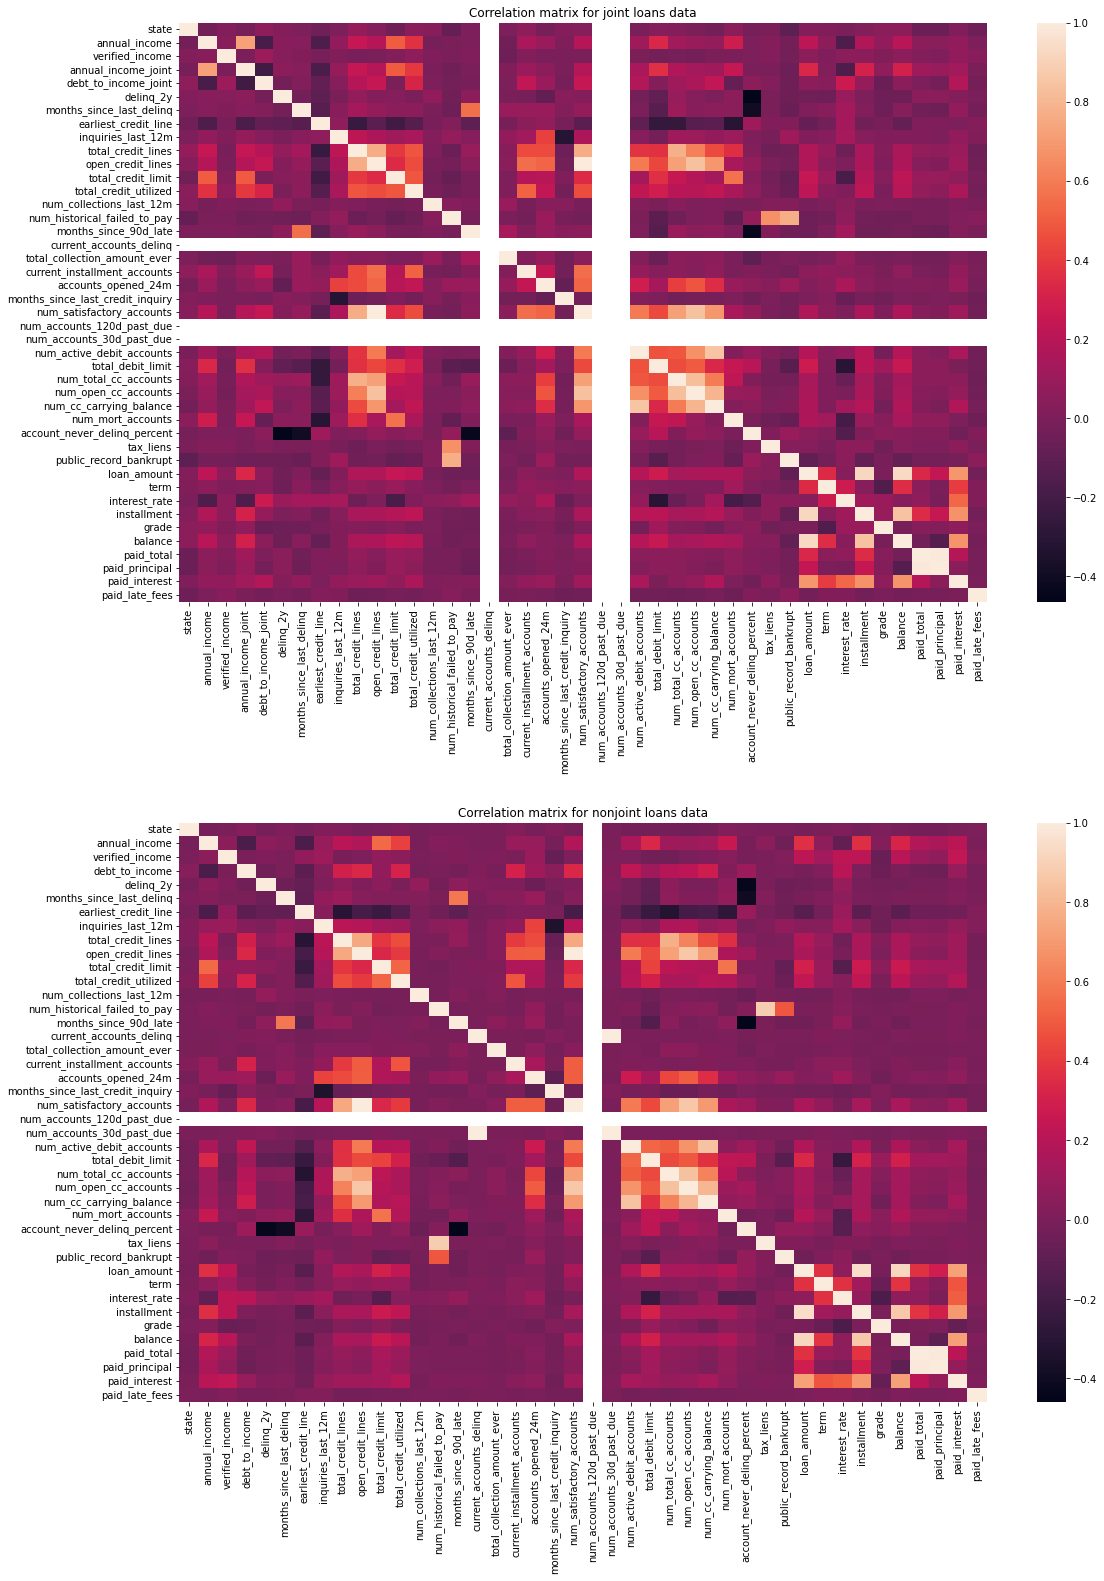

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

joint_loans_corr = joint_loans.corr()
nonjoint_loans_corr = nonjoint_loans.corr()

fig = plt.figure(figsize = (20, 25))
ax0 = fig.add_subplot(2, 1, 1) 
ax1 = fig.add_subplot(2, 1, 2)

fig.tight_layout(pad = 20.0)

sns.heatmap(joint_loans_corr, ax = ax0)
sns.heatmap(nonjoint_loans_corr, ax = ax1)

ax0.set_title('Correlation matrix for joint loans data')
ax1.set_title('Correlation matrix for nonjoint loans data')

plt.show()

Apparently there are a couple of columns with only 0's present that I have not noticed during cleaning up the data. I shall remove those columns subsequently. Apart from this there are a few features that are highly correlated, although they do not confer an additional level of meaning as these correlations stem from the basic math of loans (like correlation between loan amount and balance and installments), or correlation between things that are known to be related (number of open account and total credit lines or number of active debit accounts and number of accounts carrying balance or number of satisfactory accounts and open credit lines etc).

### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

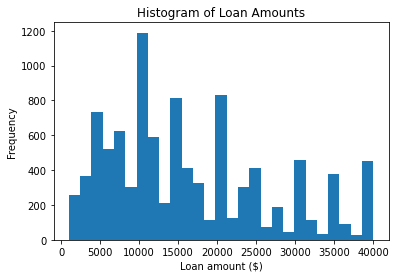

In [278]:
# we have about 10000 data points, so a maximal number for the bin size would be aroun 100 (square root of 10000)
# Sturges would give a bin number around 15, while Freedman-Diaconis is closer to 30. 
# This latter seems to be a good choice as it does not oversmooth the histogram, but we do not get lost in the details neither

_= plt.hist(loans['loan_amount'], bins = 'auto') #This uses the maximum of the Sturges and Freedman-Diaconis bin choice
_= plt.xlabel('Loan amount ($)')
_= plt.ylabel('Frequency')
_= plt.title('Histogram of Loan Amounts')
plt.show()

It looks like it is relly not a well defined distribution, rahter there are amounts that are much more frequent than others. These amounts appear at multiples of 5000 (only exemption is about 7500 dollars, which is also more fequent than other amounts around it), so the most frequent amounts are around  5000, 10000, 15000, 20000, then a bit less of 25000, 30000, 35000, 40000 dollars.

### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
### a.	Is there a better way to do this than with a lambda? 
### b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


#### Apply (lambda)

In [279]:
import time
# first I define list containing the codes for the regions:

Pacific = ['CA', 'OR',  'WA',  'AK', 'HI', 'AZ', 'NV', 'UT', 'ID']
Plains = ['MT', 'ND', 'SD', 'WY' , 'NE', 'KS', 'CO', 'OK', 'NM']
Midwest = ['IL', 'IN', 'IA','MI', 'MN', 'MO', 'OH','WI']
Northeast = ['ME', 'NY', 'NJ', 'VT', 'MA', 'RI', 'CT', 'NH', 'PA']
South = ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'SC', 'TN', 'TX', 'VA', 'WV']

dict_of_lists = {'Pacific': Pacific, 'Plains' : Plains, 'Midwest' : Midwest, 'Northeast' : Northeast, 'South' : South}

def find_region(x):
    for key, value in dict_of_lists.items():
        if x in value:
            return key

# lambda function
start = time.time()

joint_loans_original['region'] = joint_loans_original.apply(lambda row: find_region(row['state']), axis = 1)

end = time.time()

print(f'Time needed to complete: {end-start}')

Time needed to complete: 0.01403355598449707


In [280]:
start = time.time()

nonjoint_loans_original['region'] = nonjoint_loans_original.apply(lambda row: find_region(row['state']), axis = 1)

end = time.time()

print(f'Time needed to complete: {end-start}')

Time needed to complete: 0.06228494644165039


When looking for methods to create a new column based on existing columns, google recommends apply(lambda), np.select() and loc. Let's Check the latter two:

#### np.select( )

In [281]:
import numpy as np

conditions = [joint_loans_original['state'].isin(Pacific), joint_loans_original['state'].isin(Plains), 
              joint_loans_original['state'].isin(Midwest), joint_loans_original['state'].isin(Northeast),
             joint_loans_original['state'].isin(South)]

output = ['Pacific', 'Plains', 'Midwest', 'Northeast', 'South']

start = time.time()

joint_loans_original['region'] = pd.Series(np.select(conditions, output, 'NaN'))

end = time.time()

print(f'Time needed to complete: {end-start}')

Time needed to complete: 0.0009617805480957031


In [282]:
conditions = [nonjoint_loans_original['state'].isin(Pacific), nonjoint_loans_original['state'].isin(Plains), 
              nonjoint_loans_original['state'].isin(Midwest), nonjoint_loans_original['state'].isin(Northeast),
             nonjoint_loans_original['state'].isin(South)]

output = ['Pacific', 'Plains', 'Midwest', 'Northeast', 'South']

start = time.time()

nonjoint_loans_original['region'] = pd.Series(np.select(conditions, output, 'NaN'))

end = time.time()

print(f'Time needed to complete: {end-start}')

Time needed to complete: 0.0029587745666503906


This is orders of magnitude faster

#### loc.

In [290]:
start = time.time()

joint_loans_original.loc[joint_loans_original['state'].isin(Pacific),:]['region'] = 'Pacific'
joint_loans_original.loc[joint_loans_original['state'].isin(Plains),:]['region'] = 'Plains'
joint_loans_original.loc[joint_loans_original['state'].isin(Midwest),:]['region'] = 'Midwest'
joint_loans_original.loc[joint_loans_original['state'].isin(Northeast),:]['region'] = 'Northeast'
joint_loans_original.loc[joint_loans_original['state'].isin(South),:]['region'] = 'South'

end = time.time()

print(f'Time needed to complete: {end-start}')

Time needed to complete: 0.0


C:\Users\BALAZS~1.VAR\AppData\Local\Temp/ipykernel_13332/3124816798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_loans_original.loc[joint_loans_original['state'].isin(Pacific),:]['region'] = 'Pacific'
C:\Users\BALAZS~1.VAR\AppData\Local\Temp/ipykernel_13332/3124816798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_loans_original.loc[joint_loans_original['state'].isin(Plains),:]['region'] = 'Plains'
C:\Users\BALAZS~1.VAR\AppData\Local\Temp/ipykernel_13332/3124816798.py:5: SettingWithC

In [291]:
start = time.time()

nonjoint_loans_original.loc[nonjoint_loans_original['state'].isin(Pacific)]['region'] = 'Pacific'
nonjoint_loans_original.loc[nonjoint_loans_original['state'].isin(Plains)]['region'] = 'Plains'
nonjoint_loans_original.loc[nonjoint_loans_original['state'].isin(Midwest)]['region'] = 'Midwest'
nonjoint_loans_original.loc[nonjoint_loans_original['state'].isin(Northeast)]['region'] = 'Northeast'
nonjoint_loans_original.loc[nonjoint_loans_original['state'].isin(South)]['region'] = 'South'

end = time.time()

print(f'Time needed to complete: {end-start}')

Time needed to complete: 0.008998394012451172


C:\Users\BALAZS~1.VAR\AppData\Local\Temp/ipykernel_13332/3850024163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonjoint_loans_original.loc[nonjoint_loans_original['state'].isin(Pacific)]['region'] = 'Pacific'
C:\Users\BALAZS~1.VAR\AppData\Local\Temp/ipykernel_13332/3850024163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonjoint_loans_original.loc[nonjoint_loans_original['state'].isin(Plains)]['region'] = 'Plains'
C:\Users\BALAZS~1.VAR\AppData\Local\Temp/ipykernel_13332/3850024163.py:5: Sett

This is still about 1000 fold faster than lambda

### 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [292]:
joint_amount_region = joint_loans_original[['loan_amount', 'region']]
                                            
nonjoint_amount_region = nonjoint_loans_original[['loan_amount', 'region']]

joint_amount_region.head()
joint_loans_original.head()

,state,annual_income,verified_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,term,interest_rate,installment,grade,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
4,CA,35000.0,1,57000.0,37.66,0,0.0,2008,7,22,...,36,14.07,786.87,C,21430.15,2324.65,1569.85,754.80,0.0,Northeast
6,MI,35000.0,1,155000.0,13.12,0,0.0,2004,1,12,...,60,13.59,553.35,C,22560.00,2730.51,1440.00,1290.51,0.0,South
21,NV,42000.0,1,95000.0,16.12,0,0.0,1991,4,19,...,36,11.98,332.05,B,9296.37,989.49,703.63,285.86,0.0,Plains
32,AR,50000.0,1,101000.0,20.92,1,3.0,1982,0,31,...,60,19.03,493.19,D,18214.02,1922.54,785.98,1136.56,0.0,Northeast
37,NJ,70000.0,1,105000.0,13.27,0,102.0,1988,2,21,...,60,15.04,571.47,C,23455.27,1102.83,544.73,558.10,0.0,South


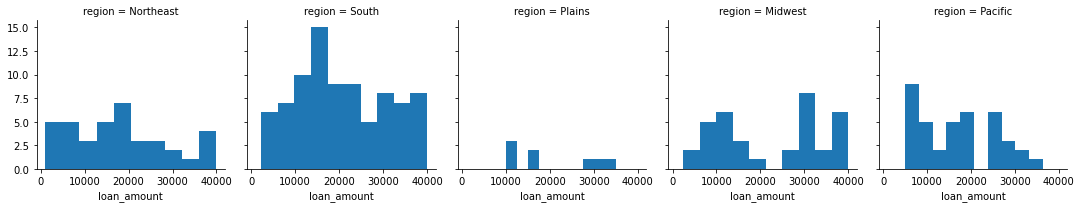

In [293]:
g = sns.FacetGrid(joint_amount_region, col = 'region')
g.map(plt.hist, 'loan_amount')
plt.show()

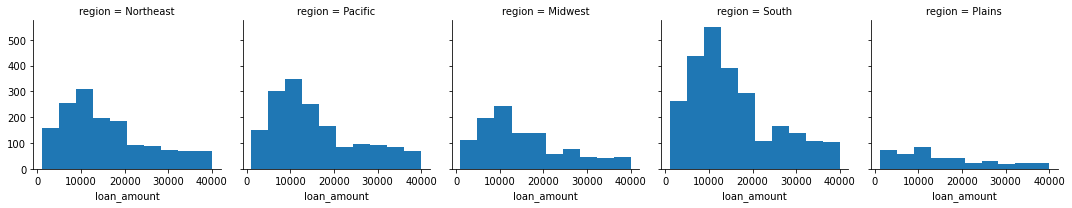

In [294]:
g = sns.FacetGrid(nonjoint_amount_region, col = 'region')
g.map(plt.hist, 'loan_amount')
plt.show()

Looks like for joint loans, generally the distribution is more even, except for the south where loans of about 15000 show a peak. As for the single guarantor loans usually they peak around 10000 in every region except for the plains where likelyhood of bigger loans gradually declines.

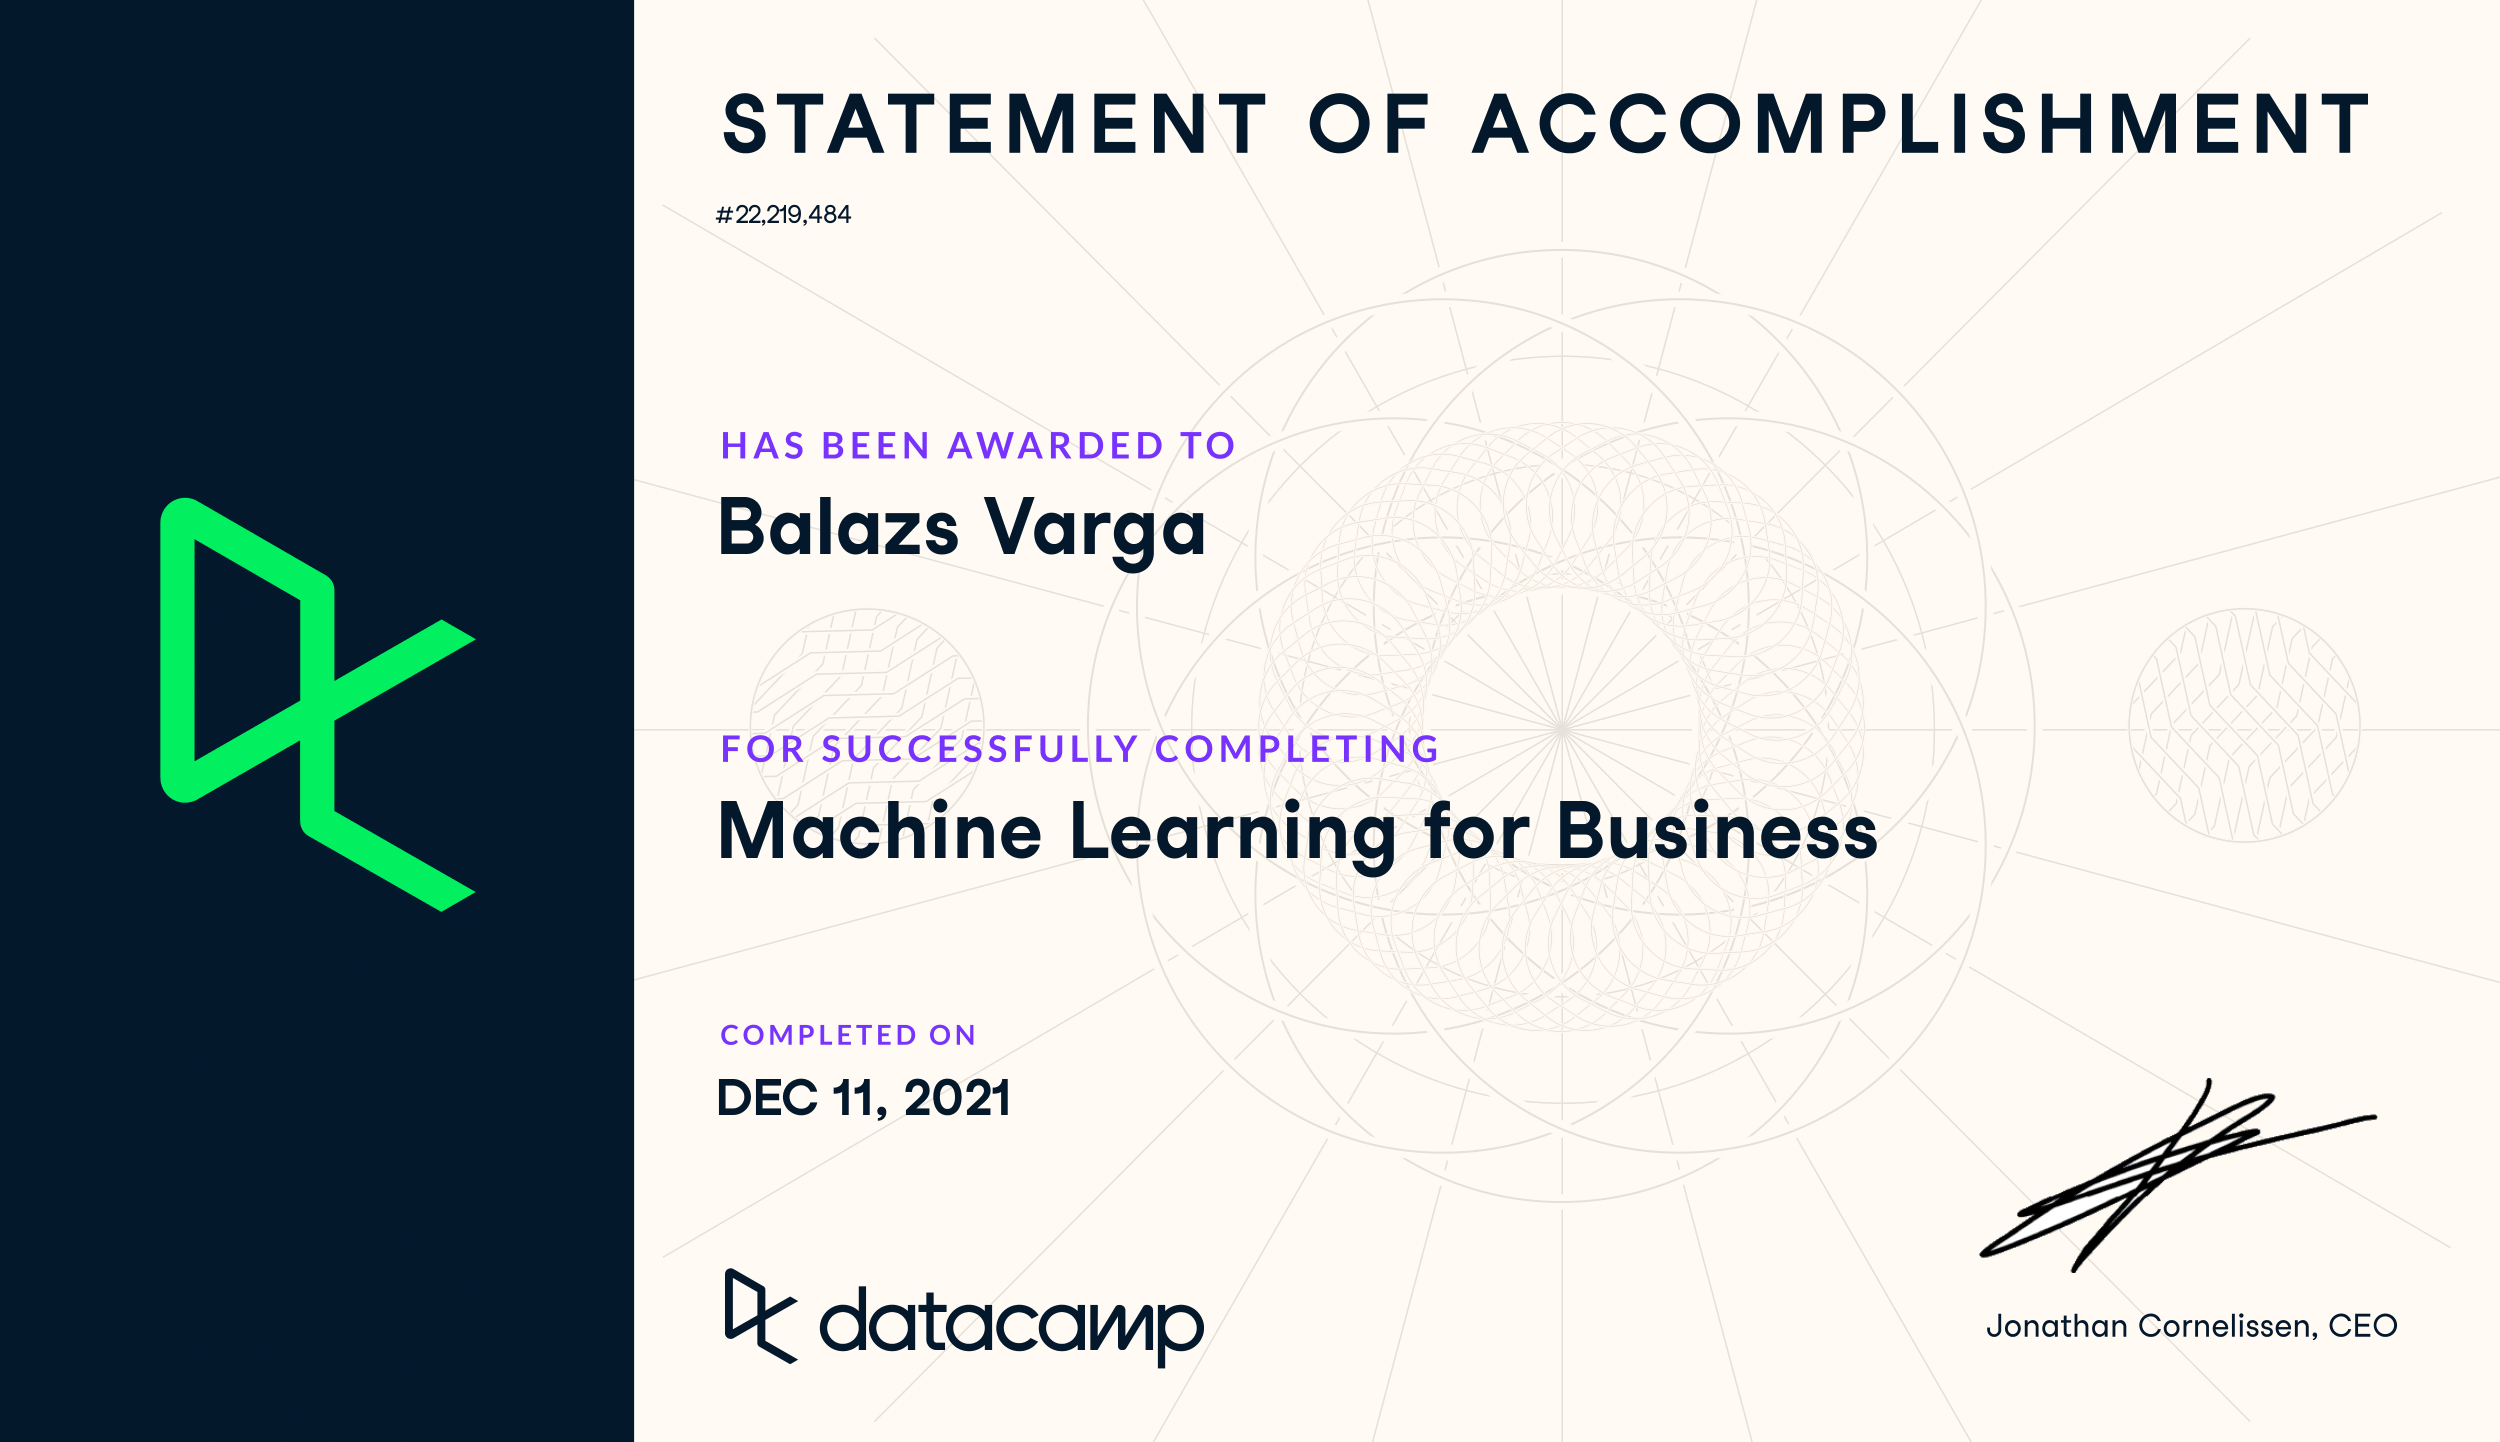

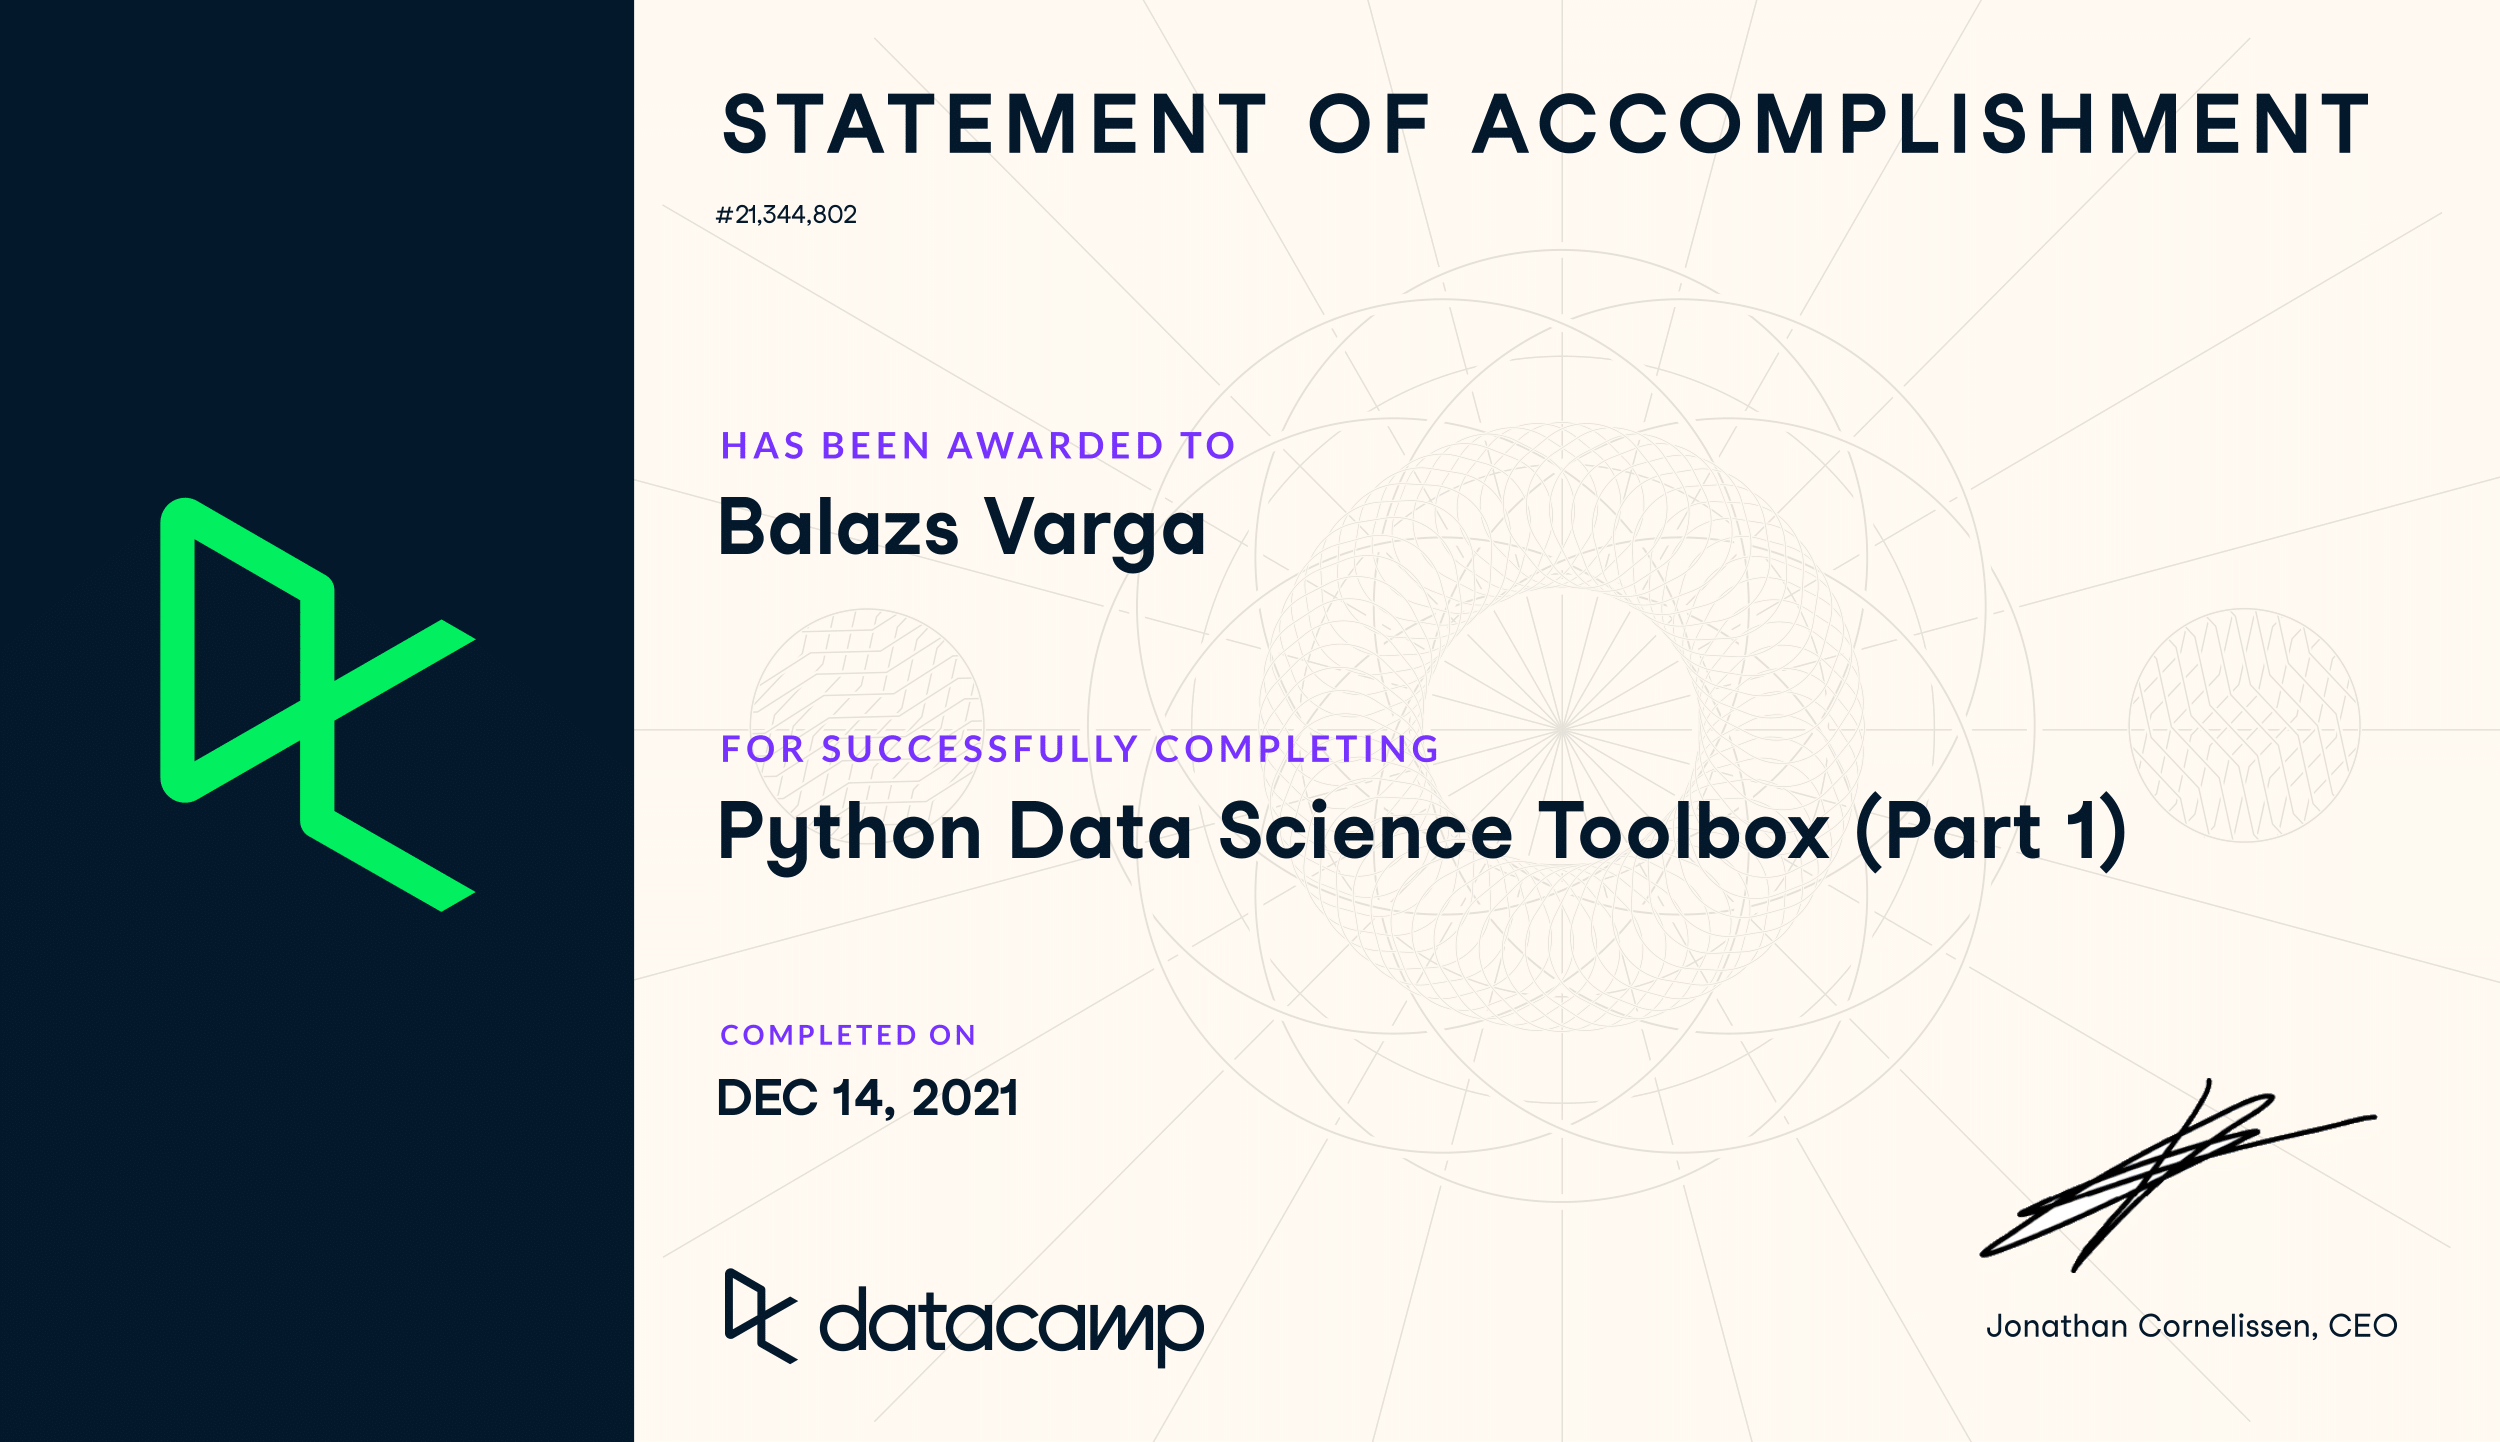

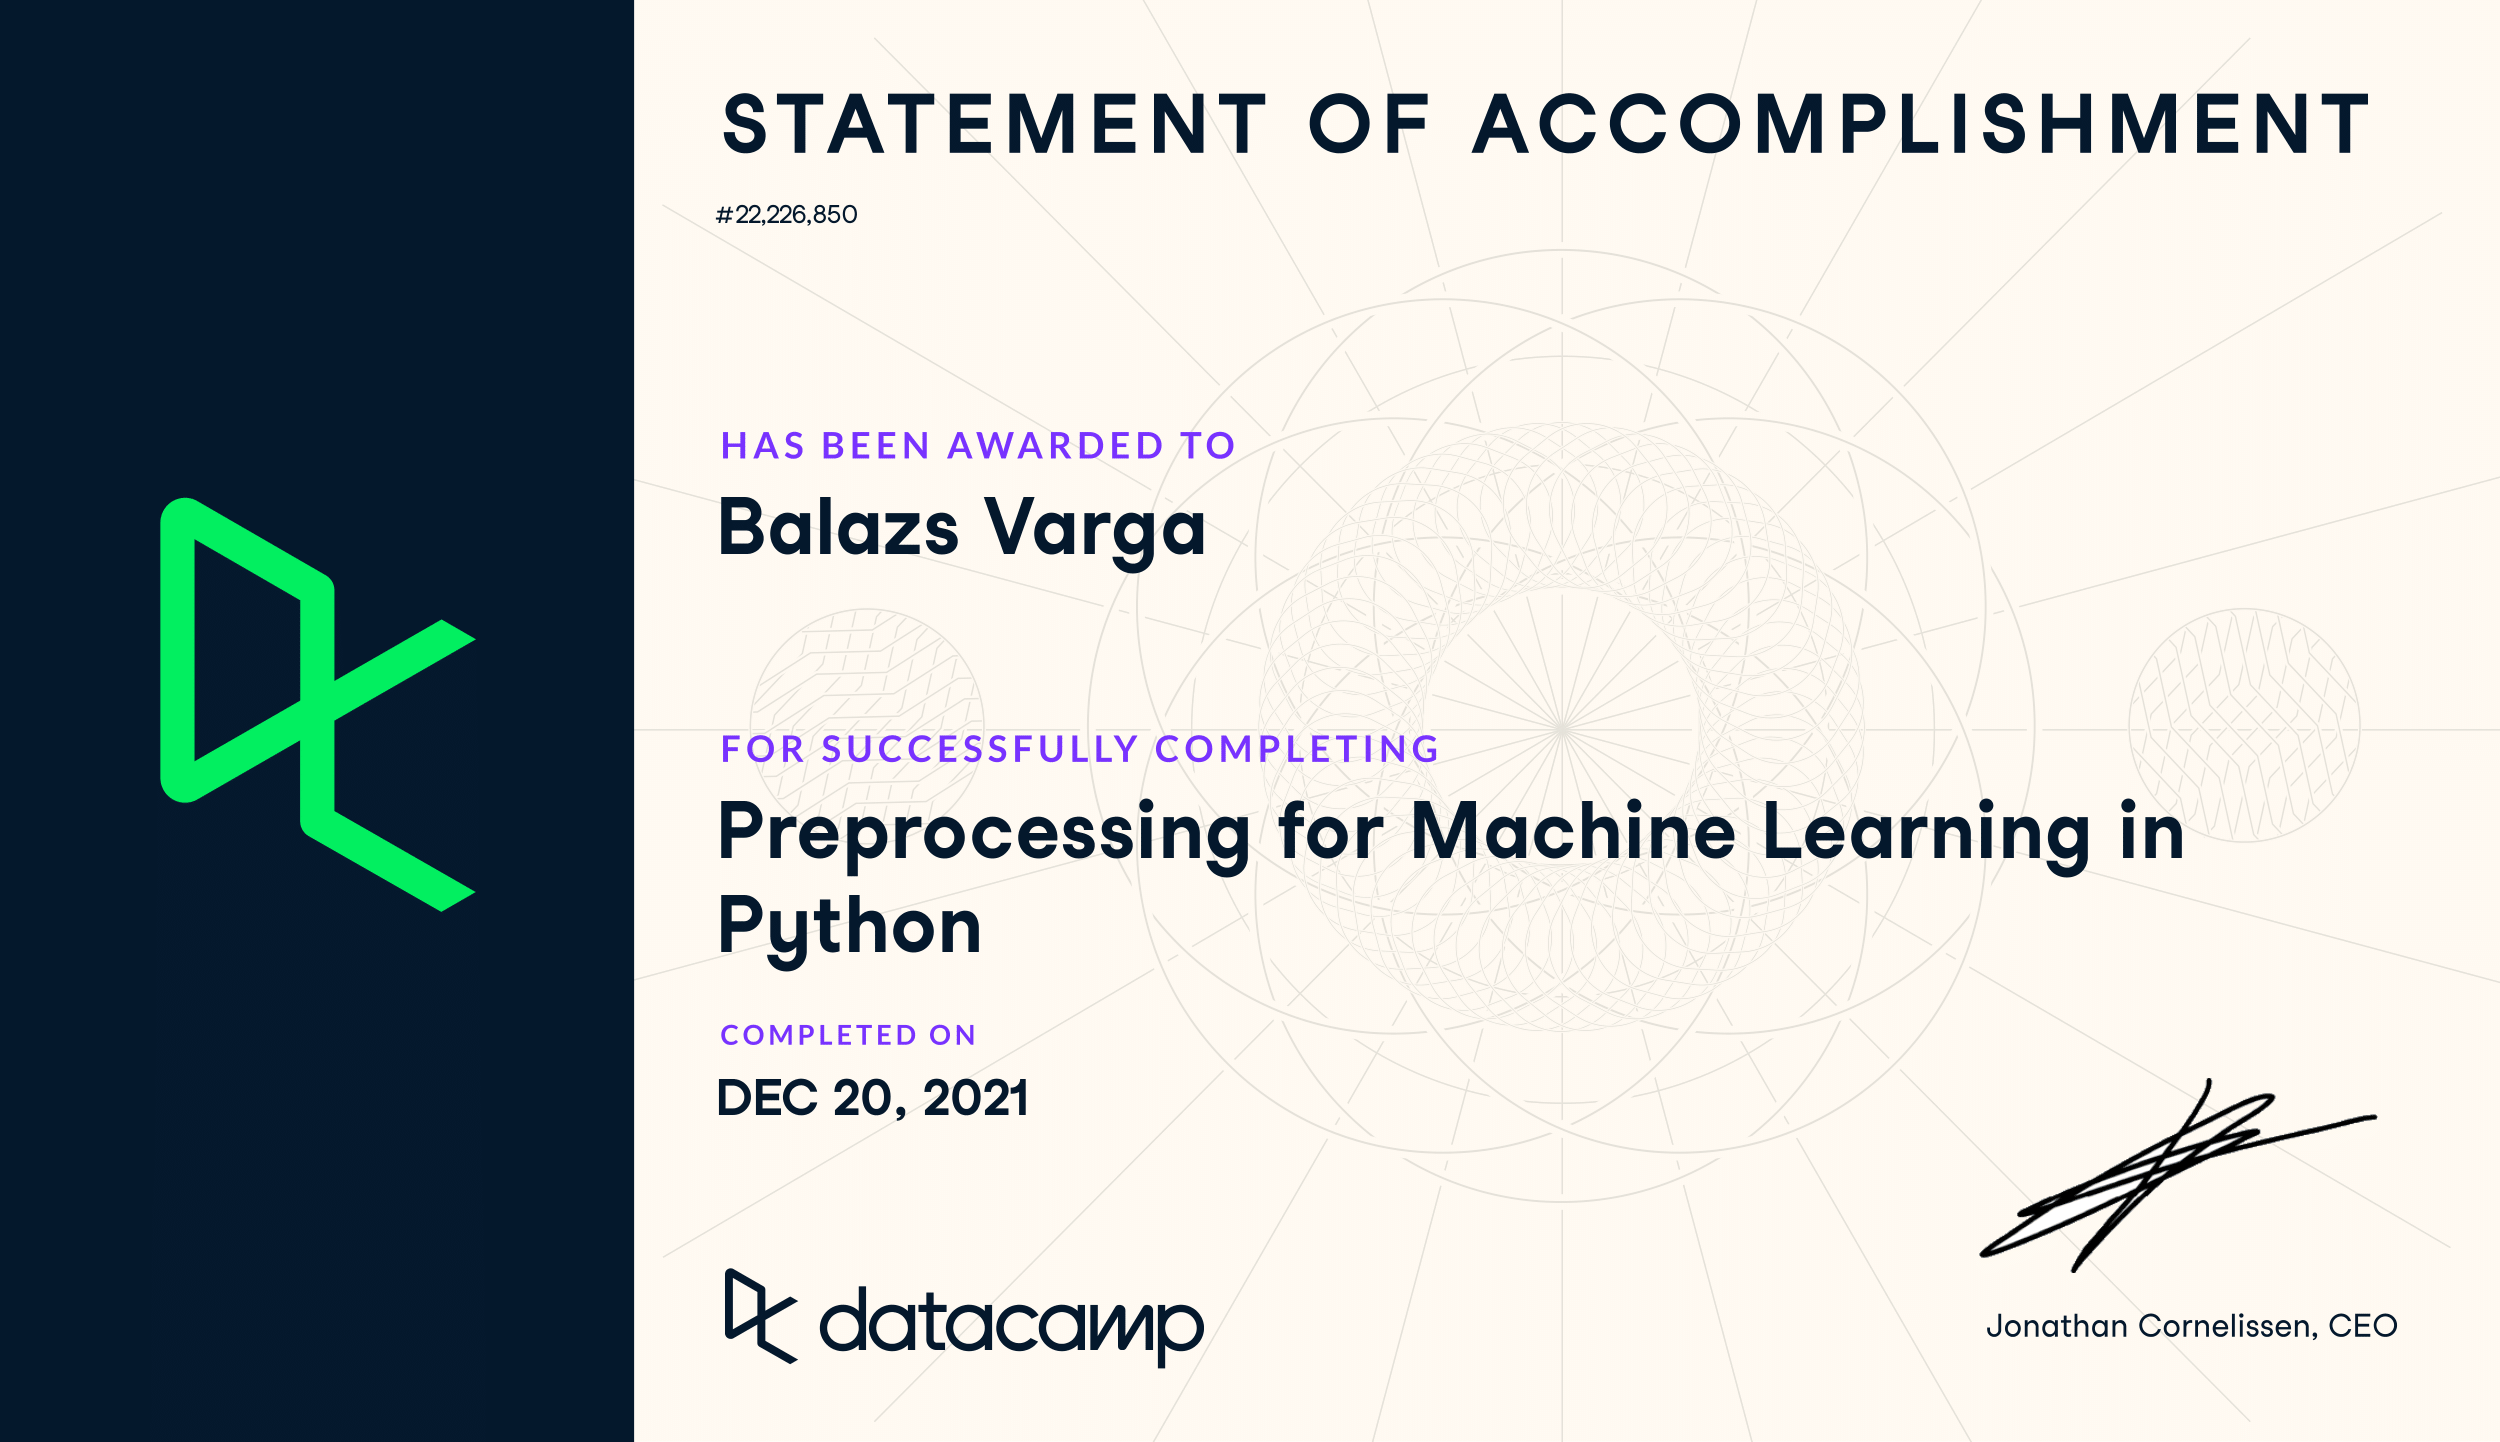